### Check model results for lineage

In [13]:
import os
import pandas as pd
import glob
import re

In [6]:
dir_in_anlyz = '../out/20.0216 feat/reg_rf_boruta/anlyz/'

df = pd.read_csv(os.path.join(dir_in_anlyz, 'feat_summary_varExp.csv'))

In [12]:
df.groupby('feat_source')['feat_source'].count()

feat_source
CERES      3810
CN          280
Mut           6
RNA-seq    1734
Name: feat_source, dtype: int64

Lineage is not in the results (top 10 features). Check then in all the selected features

In [72]:
# check for in the selected features
dir_in_perf = '../out/20.0216 feat/reg_rf_boruta/model_perf/'

counts = {'CERES':0,
          'RNA-seq':0,
          'CN':0,
          'Mut':0,
          'Lineage':0}
df_lineage = pd.DataFrame()
for fname in glob.glob('%s/feats_*.csv' % dir_in_perf):
    df = pd.read_csv(fname) # read in the features
    df_feat = pd.DataFrame({'feature':df.feature.str.extract('^(.*)\s')[0],
                            'feature_source':df.feature.str.extract('\[(.*)\]')[0]})
    df_feat['target'] = re.findall('feats_(.*)\.csv', fname)[0]
    df_counts = df.feature.str.extract('\[(.*)\]').groupby(0).size() # tally the counts
    for n,v in zip(df_counts.index, df_counts.values):
        counts[n] = counts[n]+v # add to the counts
        
    if sum(df_feat.feature_source == 'Lineage')>0:
        df_tmp = df_feat.loc[df_feat.feature_source == 'Lineage',:].copy()
        df_lineage = pd.concat([df_lineage, df_tmp])

In [91]:
df_counts = pd.Series(counts)

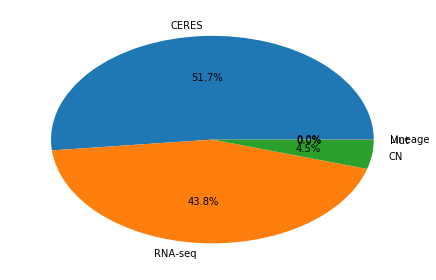

In [108]:
import matplotlib.pyplot as plt
plt.figure()
plt.pie(df_counts.values, labels=df_counts.index.values, autopct='%0.1f%%')
plt.tight_layout()

In [74]:
df_lineage

,feature,feature_source,target
102,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Lineage,PPCDC
18,PANCREAS,Lineage,KRAS
29,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Lineage,NAMPT
54,SKIN,Lineage,SOX10
26,SKIN,Lineage,DUSP4
120,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Lineage,ATP1B3
40,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Lineage,CBFB
64,LARGE_INTESTINE,Lineage,CTNNB1
30,HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,Lineage,NCKAP1
39,SKIN,Lineage,BRAF
